In [8]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Data (1).csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataframe
print(df.info())

# Check for missing values
print(df.isnull().sum())


  policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No  

### Inspecting data

In [9]:
# Step 1: Inspect the Data

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Step 2: Clean the Data

# Handle missing values (if any)
# For example, fill missing numerical values with the mean
df = df.fillna(df.mean())

# Drop non-numeric identifiers (e.g., policy_id)
df = df.drop(columns=['policy_id'])  # Adjust column names as necessary

# Verify cleaning
print(df.info())


       policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786    

C:\Users\ykumar\AppData\Local\Temp\ipykernel_15448\3711513144.py:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  int64  
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

### Checking for imbalance in dataset

In [10]:
# Count the occurrences of each class
class_counts = df['is_claim'].value_counts()

# Calculate the percentage of each class
class_percentages = (class_counts / len(df)) * 100

# Display the counts and percentages
print("Class Counts:\n", class_counts)
print("Class Percentages:\n", class_percentages)

Class Counts:
 0    54844
1     3748
Name: is_claim, dtype: int64
Class Percentages:
 0    93.603222
1     6.396778
Name: is_claim, dtype: float64


### Handle Outliers and Standardize Data and Encoding Categorical Columns

In [11]:
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Assuming df is your DataFrame and 'is_claim' is the target column

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns identified:", categorical_cols)

# Initialize LabelEncoders and encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Verify encoding
print(df.head())
print(df.dtypes)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('is_claim')  # Exclude the target column

# Detect and remove outliers using z-score
df_clean = df[(np.abs(stats.zscore(df[numerical_cols])) < 3).all(axis=1)].copy()

# Standardize numerical features
scaler = StandardScaler()
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

# Ensure the target column is included and realign the index
df_clean['is_claim'] = df.loc[df_clean.index, 'is_claim']

# Verify the cleaned data
print(df_clean.head())
print(df_clean.describe())


Categorical columns identified: Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
   policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.515874        0.05             0.644231             0   
1       0.672619        0.02             0.375000            11   
2       0.841110        0.02             0.384615            15   
3       0.900277        0.11             0.432692            16   
4       0.596403        0.1

### Separate Features and Target

In [12]:
# Separate input features and target
X = df_clean.drop('is_claim', axis=1)
y = df_clean['is_claim']

# Verify separation
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0      -0.244445   -0.333828             1.430041     -2.163975   
1       0.133875   -0.890320            -0.771967     -0.429312   
2       0.540546   -0.890320            -0.693323      0.201474   
3       0.683350    0.779156            -0.300108      0.359171   
5       0.969197    0.037167             0.407680      0.674564   

   population_density      make   segment     model  fuel_type  max_torque  \
0           -0.869106 -0.657507 -1.313006 -1.491677  -1.199207    0.891563   
1            0.921437 -0.657507 -1.313006 -1.491677  -1.199207    0.891563   
2           -0.943451 -0.657507 -1.313006 -1.491677  -1.199207    0.891563   
3            0.483745 -0.657507  0.690684 -0.564921   1.239961   -1.340980   
5           -0.213422  1.068564  1.358581  0.052916   0.020377    0.445055   

   ...  is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
0  ...                -0.770623        -1

### checking better SMOTE ratio

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Define a function to evaluate different SMOTE ratios
def evaluate_smote_ratio(sampling_strategy):
    # Apply SMOTE with the specified sampling strategy
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
    
    # Train a model (e.g., RandomForestClassifier)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Print metrics
    print(f"Sampling Strategy: {sampling_strategy}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC-AUC:", roc_auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Experiment with different SMOTE ratios
for ratio in [1.0, 0.5, 0.3, 0.2]:  # 1:1, 1:2, 1:3, 1:4 ratios
    evaluate_smote_ratio(ratio)



Sampling Strategy: 1.0
Precision: 0.9196534618877943
Recall: 0.9198462613556954
F1 Score: 0.91974985151801
ROC-AUC: 0.9726219622446036
Confusion Matrix:
 [[13293  1150]
 [ 1147 13163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     14443
           1       0.92      0.92      0.92     14310

    accuracy                           0.92     28753
   macro avg       0.92      0.92      0.92     28753
weighted avg       0.92      0.92      0.92     28753



Sampling Strategy: 0.5
Precision: 0.9060808659662528
Recall: 0.7920957417200112
F1 Score: 0.8452628452628452
ROC-AUC: 0.9542547020447433
Confusion Matrix:
 [[13789   590]
 [ 1494  5692]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     14379
           1       0.91      0.79      0.85      7186

    accuracy                           0.90     21565
   macro avg       0.90      0.88

### Applying smote with 1:1 ratio

In [28]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df_clean, X, and y are already defined from the previous steps

# Apply SMOTE with a 1:1 ratio
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['is_claim'])], axis=1)

# Verify the new class distribution
print(df_resampled['is_claim'].value_counts())

# Save the resampled data for future use (optional)
df_resampled.to_csv('C:/Users/ykumar/Learnbay/Mainproject_learnbay/resampled_data.csv', index=False)


0    47921
1    47921
Name: is_claim, dtype: int64


### Splitting data

In [29]:
from sklearn.model_selection import train_test_split
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Verify the split
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (67089, 43)
Testing features shape: (28753, 43)
Training labels shape: (67089,)
Testing labels shape: (28753,)


In [37]:
pip install xgboost

                                              0.0/124.9 MB ? eta -:--:--
                                              0.1/124.9 MB 3.2 MB/s eta 0:00:40
                                              0.2/124.9 MB 3.3 MB/s eta 0:00:39
                                              0.3/124.9 MB 3.2 MB/s eta 0:00:40
                                              0.5/124.9 MB 3.2 MB/s eta 0:00:40
                                              0.6/124.9 MB 3.0 MB/s eta 0:00:42
                                              0.9/124.9 MB 3.4 MB/s eta 0:00:37
                                              1.1/124.9 MB 3.6 MB/s eta 0:00:35
                                              1.2/124.9 MB 3.6 MB/s eta 0:00:35
                                              1.2/124.9 MB 3.6 MB/s eta 0:00:35
                                              1.4/124.9 MB 3.2 MB/s eta 0:00:40
                                              1.6/124.9 MB 3.2 MB/s eta 0:00:39
                                              1

### Training models

In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "NaiveBayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store evaluation results
evaluation_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store the evaluation results
    evaluation_results[model_name] = {
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

# Print evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print(f"ROC-AUC: {metrics['ROC-AUC']}")
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print("Classification Report:\n", metrics['Classification Report'])
    print("\n")


C:\Users\ykumar\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:54:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: RandomForest
Precision: 0.9388822995883626
Recall: 0.9403913347309574
F1 Score: 0.9396362112907167
ROC-AUC: 0.984046317065185
Confusion Matrix:
 [[13567   876]
 [  853 13457]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     14443
           1       0.94      0.94      0.94     14310

    accuracy                           0.94     28753
   macro avg       0.94      0.94      0.94     28753
weighted avg       0.94      0.94      0.94     28753



Model: LogisticRegression
Precision: 0.5720883534136546
Recall: 0.5972746331236898
F1 Score: 0.5844102564102565
ROC-AUC: 0.6103643600934839
Confusion Matrix:
 [[8050 6393]
 [5763 8547]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.56      0.57     14443
           1       0.57      0.60      0.58     14310

    accuracy                           0.58     28753
   macro avg       0.58      0.58   

### Plotting performance of different models

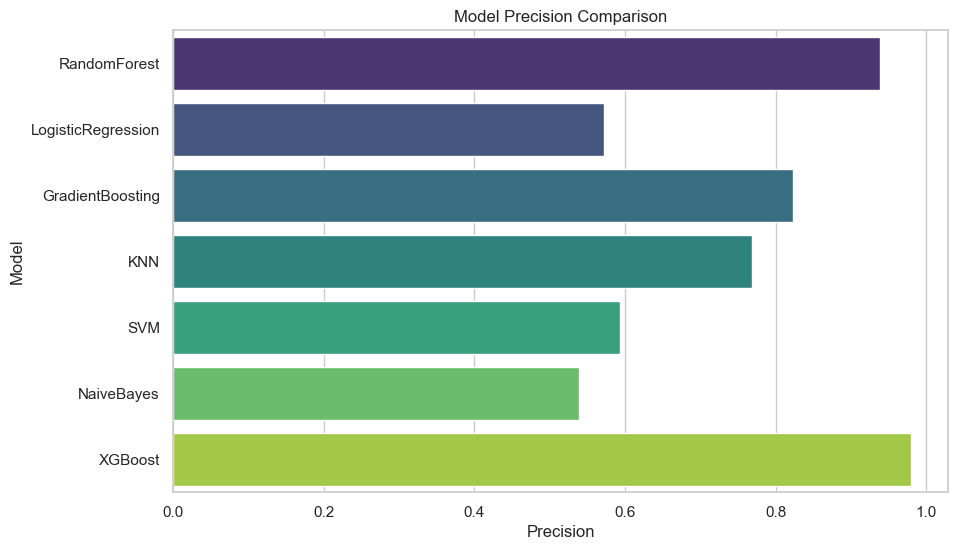

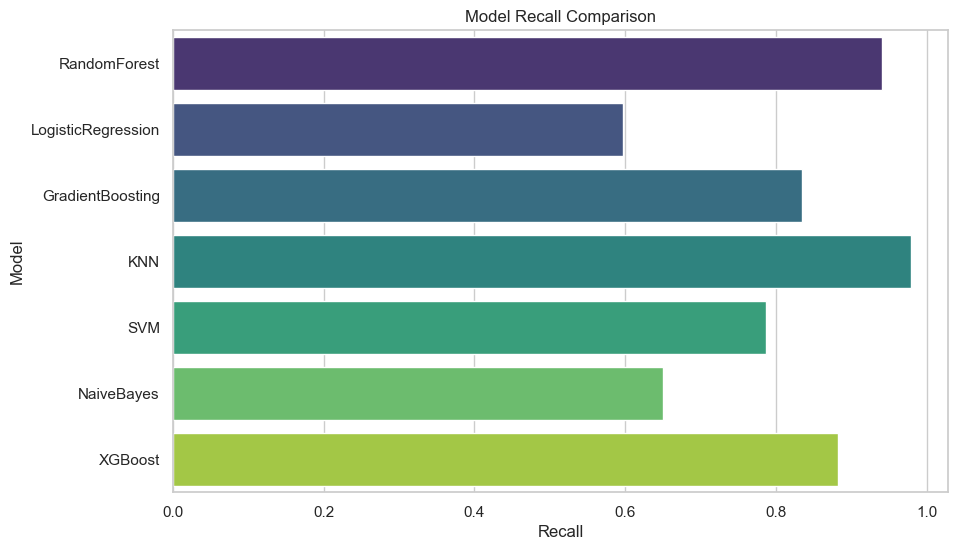

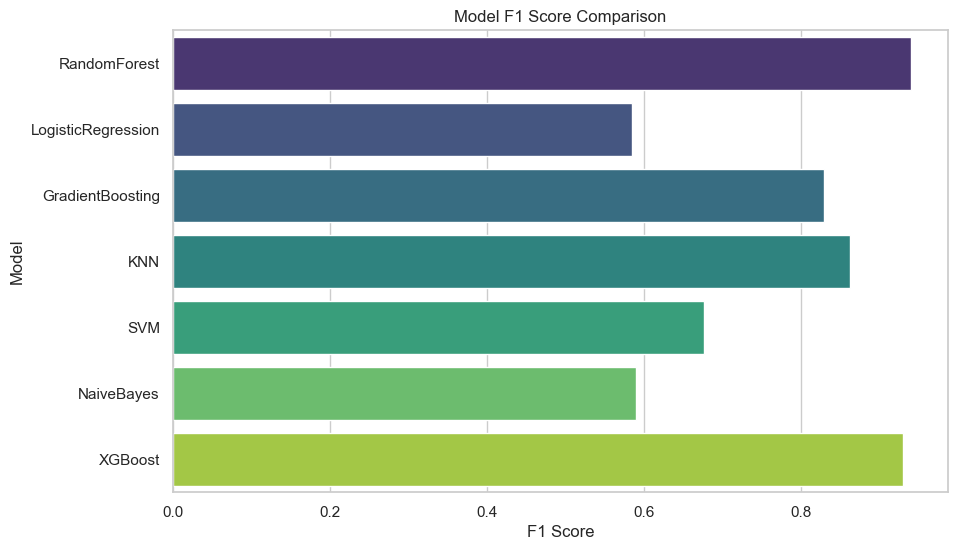

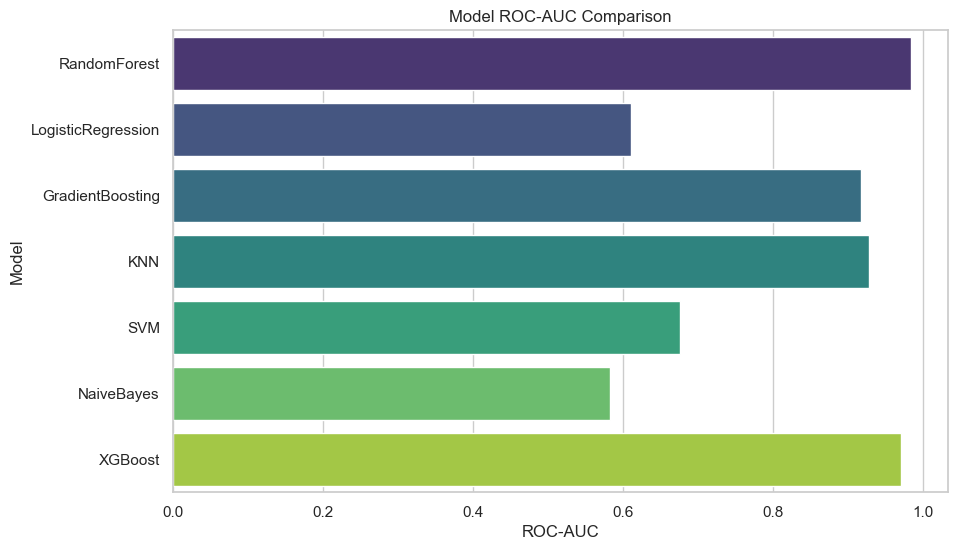

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
model_names = list(evaluation_results.keys())
precisions = [metrics['Precision'] for metrics in evaluation_results.values()]
recalls = [metrics['Recall'] for metrics in evaluation_results.values()]
f1_scores = [metrics['F1 Score'] for metrics in evaluation_results.values()]
roc_aucs = [metrics['ROC-AUC'] for metrics in evaluation_results.values()]

# Create a DataFrame for easier plotting
import pandas as pd

df_metrics = pd.DataFrame({
    'Model': model_names,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC-AUC': roc_aucs
})

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot Precision
plt.figure(figsize=(10, 6))
sns.barplot(x='Precision', y='Model', data=df_metrics, palette='viridis')
plt.title('Model Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Model')
plt.show()

# Plot Recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Recall', y='Model', data=df_metrics, palette='viridis')
plt.title('Model Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Model')
plt.show()

# Plot F1 Score
plt.figure(figsize=(10, 6))
sns.barplot(x='F1 Score', y='Model', data=df_metrics, palette='viridis')
plt.title('Model F1 Score Comparison')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.show()

# Plot ROC-AUC
plt.figure(figsize=(10, 6))
sns.barplot(x='ROC-AUC', y='Model', data=df_metrics, palette='viridis')
plt.title('Model ROC-AUC Comparison')
plt.xlabel('ROC-AUC')
plt.ylabel('Model')
plt.show()


### Fine-tune the Best Model:

Perform hyperparameter tuning on the best-performing model to optimize its performance.

In [33]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC-AUC Score:", best_score)

# Train the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Tuned Model Performance:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\ykumar\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:01:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best ROC-AUC Score: 0.9742223088170076
Tuned Model Performance:
Precision: 0.9811479806881753
Recall: 0.8946890286512929
F1 Score: 0.9359260206878907
ROC-AUC: 0.9748212097455514
Confusion Matrix:
 [[14197   246]
 [ 1507 12803]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     14443
           1       0.98      0.89      0.94     14310

    accuracy                           0.94     28753
   macro avg       0.94      0.94      0.94     28753
weighted avg       0.94      0.94      0.94     28753



### Code to Plot Metrics Before and After Hyperparameter Tuning:

C:\Users\ykumar\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:01:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


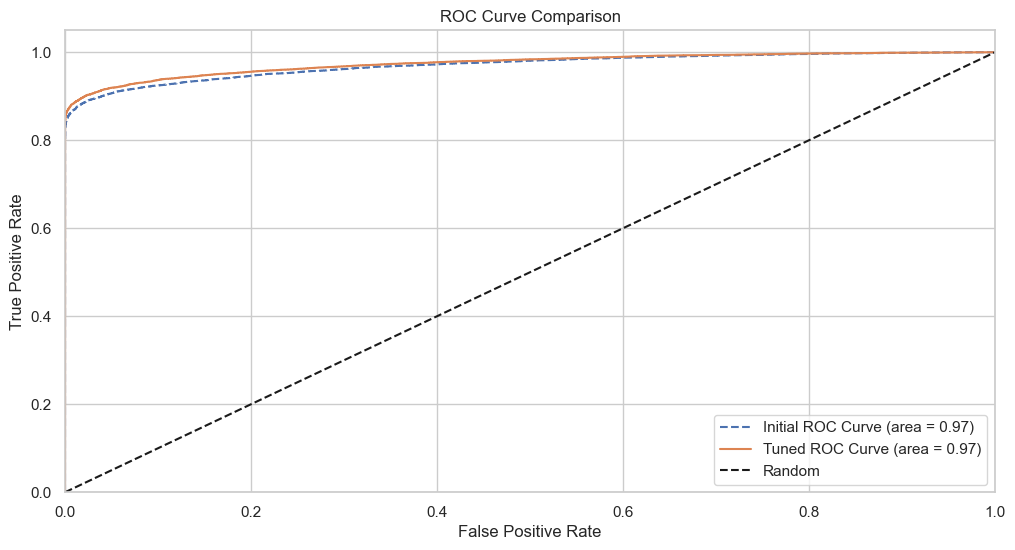

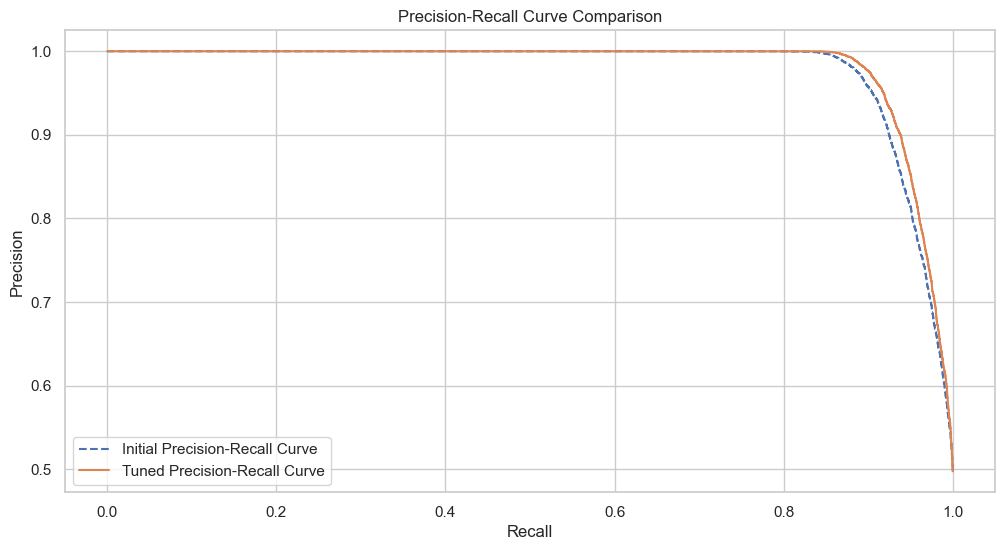

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve

# Evaluate the initial model
initial_xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
initial_xgb_model.fit(X_train, y_train)
y_pred_proba_initial = initial_xgb_model.predict_proba(X_test)[:, 1]
roc_auc_initial = roc_auc_score(y_test, y_pred_proba_initial)
precision_initial_curve, recall_initial_curve, _ = precision_recall_curve(y_test, y_pred_proba_initial)
fpr_initial, tpr_initial, _ = roc_curve(y_test, y_pred_proba_initial)

# Evaluate the tuned model
y_pred_proba_tuned = best_xgb_model.predict_proba(X_test)[:, 1]
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
precision_tuned_curve, recall_tuned_curve, _ = precision_recall_curve(y_test, y_pred_proba_tuned)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)

# Plot ROC Curve for both models
plt.figure(figsize=(12, 6))
plt.plot(fpr_initial, tpr_initial, label=f'Initial ROC Curve (area = {roc_auc_initial:.2f})', linestyle='--')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned ROC Curve (area = {roc_auc_tuned:.2f})', linestyle='-')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curve for both models
plt.figure(figsize=(12, 6))
plt.plot(recall_initial_curve, precision_initial_curve, label='Initial Precision-Recall Curve', linestyle='--')
plt.plot(recall_tuned_curve, precision_tuned_curve, label='Tuned Precision-Recall Curve', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.show()

In [46]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Refit the best XGBoost model with the best parameters
best_xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    colsample_bytree=best_params['colsample_bytree'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample'],
    random_state=42
)

best_xgb_model.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\ykumar\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:09:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ykumar\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:09:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Analyze Feature Importance with SHAP:

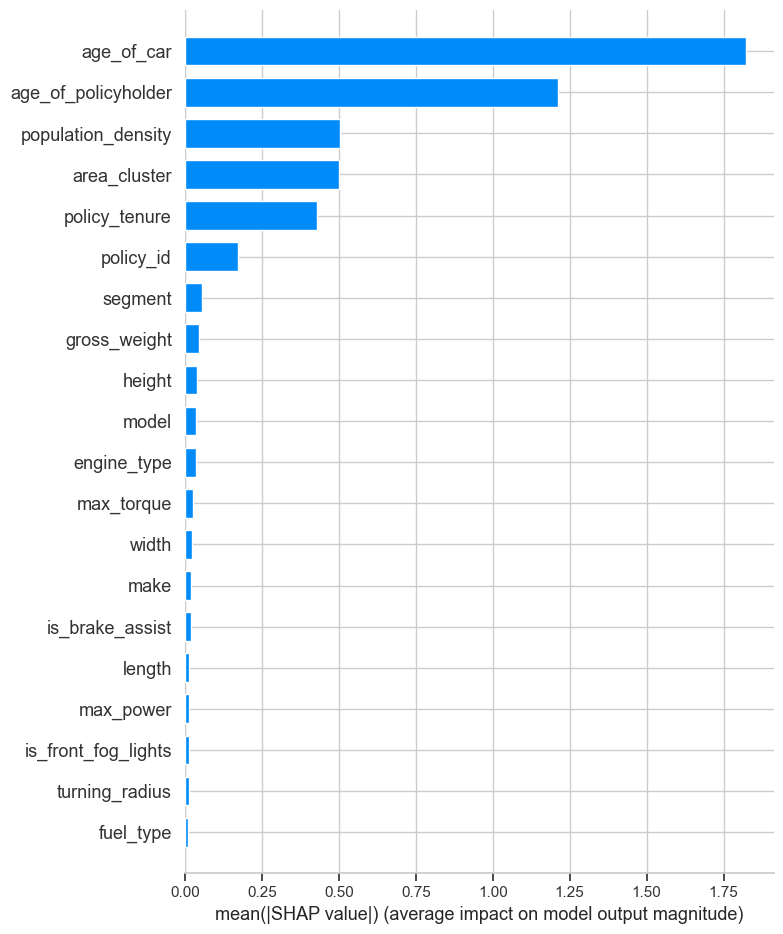

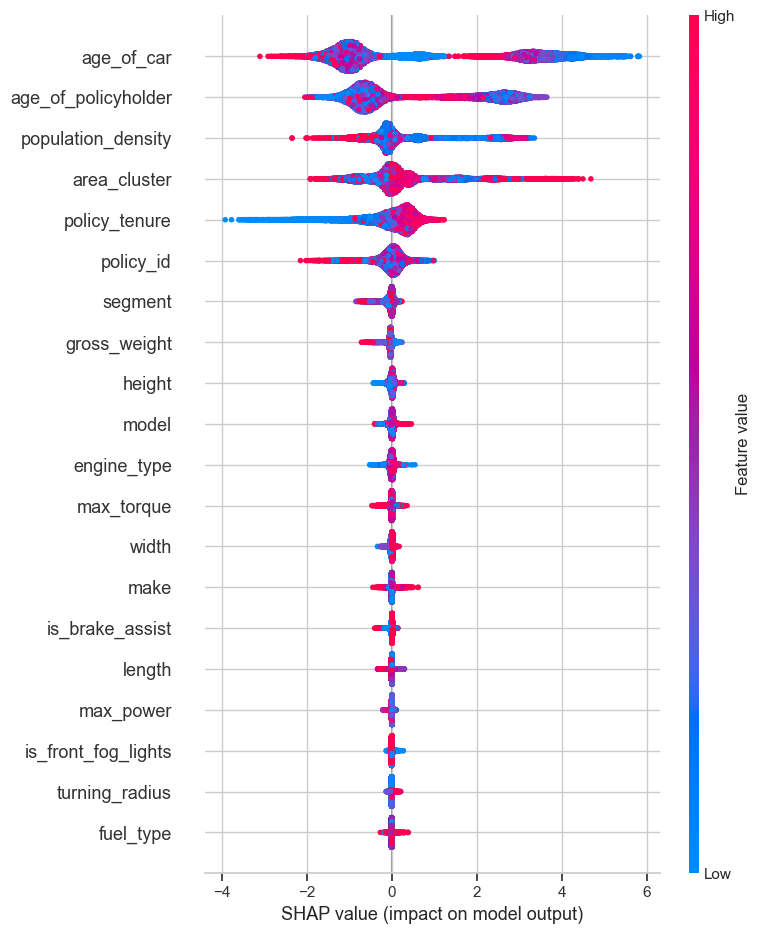

In [38]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot detailed SHAP summary plot
shap.summary_plot(shap_values, X_test)


### cross-validation on the best-performing model (XGBoost)

In [39]:
from sklearn.model_selection import cross_val_score

# Initialize the best XGBoost model with the best parameters
best_xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    colsample_bytree=1.0,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(best_xgb_model, X_resampled, y_resampled, cv=5, scoring='roc_auc', n_jobs=-1)

# Calculate mean and standard deviation of cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f'Cross-Validation ROC-AUC Scores: {cv_scores}')
print(f'Mean ROC-AUC: {cv_mean}')
print(f'Standard Deviation of ROC-AUC: {cv_std}')

Cross-Validation ROC-AUC Scores: [0.45695948 0.73506666 0.73548998 0.75638397 0.43197168]
Mean ROC-AUC: 0.6231743549641718
Standard Deviation of ROC-AUC: 0.14633204387347
